In [125]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [126]:
df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [127]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [128]:
print(df.shape)

(15730, 16)


In [129]:
df.describe()

,id,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,15730.000000,15730.000000,15730.000000,15730.000000,15052.000000,15152.000000,15142.000000,15191.000000,15499.000000,15730.000000,15730.000000,15730.000000
mean,10479.541577,4.012873,688.070693,1369.286777,3057.660776,423.976307,1585.239466,655.923310,357.260662,155.085188,275.500572,0.601526
std,6080.166276,0.298440,649.409586,1240.900227,11846.965689,1768.230384,6177.476241,2855.735531,1402.246610,558.650254,958.589075,0.489600
min,3.000000,0.000000,69.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5212.000000,3.900000,349.000000,699.000000,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10458.500000,4.000000,474.000000,999.000000,308.000000,44.000000,150.000000,60.000000,34.000000,17.000000,30.000000,1.000000
75%,15766.750000,4.200000,699.000000,1299.000000,1526.000000,215.000000,788.000000,300.000000,172.000000,77.000000,140.000000,1.000000
max,20973.000000,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


In [130]:
df.corr()['price1']

id            0.004378
Rating        0.291511
price1        1.000000
actprice1     0.889304
norating1    -0.045184
noreviews1   -0.040171
star_5f      -0.040196
star_4f      -0.031649
star_3f      -0.056558
star_2f      -0.071090
star_1f      -0.070024
fulfilled1    0.256335
Name: price1, dtype: float64

In [131]:
df.columns[df.isna().any()]

Index(['maincateg', 'norating1', 'noreviews1', 'star_5f', 'star_4f',
       'star_3f'],
      dtype='object')

In [132]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [133]:
print(df[df['title'].str.contains('Women')]['maincateg'].isna().sum())
print(df[df['title'].str.contains('Men')]['maincateg'].isna().sum())


275
190


In [134]:
df['maincateg'] = df[df['title'].str.contains('Women')]['maincateg'].fillna('Women')
df['maincateg'] = df['maincateg'].fillna('Men')
print(df['maincateg'].isna().sum())

0


In [135]:

df['Rating']=df['Rating'].fillna(df.groupby('maincateg')['Rating'].transform('mean'))
df['star_5f']=df['star_5f'].fillna(df.groupby('maincateg')['star_5f'].transform('mean'))
df['star_4f']=df['star_4f'].fillna(df.groupby('maincateg')['star_4f'].transform('mean'))
df['star_3f']=df['star_4f'].fillna(df.groupby('maincateg')['star_3f'].transform('mean'))
df['star_2f']=df['star_4f'].fillna(df.groupby('maincateg')['star_2f'].transform('mean'))
print(df.isnull().sum())

id              0
title           0
Rating          0
maincateg       0
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f         0
star_4f         0
star_3f         0
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64


In [136]:
df['norating1']=df['norating1'].fillna(df.groupby('maincateg')['norating1'].transform('mean'))
df['noreviews1']=df['noreviews1'].fillna(df.groupby('maincateg')['noreviews1'].transform('mean'))
print(df.isnull().sum())

id            0
title         0
Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64





## Now there are no null values in our dataset , hence the data set is fready for training the model

# DATA VISUALIZATION 

In [137]:
df.corr()['price1']

id            0.004378
Rating        0.291511
price1        1.000000
actprice1     0.889304
norating1    -0.043926
noreviews1   -0.038949
star_5f      -0.039304
star_4f      -0.030785
star_3f      -0.030785
star_2f      -0.030785
star_1f      -0.070024
fulfilled1    0.256335
Name: price1, dtype: float64

## DATA PREPROCESSING

In [138]:
df['maincateg']=df['maincateg'].map({'Men':0,'Women':1})
df['platform']=df['platform'].map({'Flipkart':0,'Amazon':1})
df.head(5)


,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,1,0,698,999,30.13%,38.0,7.0,17.0,9.0,9.0,9.0,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,0,999,1999,50.03%,531.0,69.0,264.0,92.0,92.0,92.0,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,1,0,2749,4999,45.01%,17.0,4.0,11.0,3.0,3.0,3.0,0,1
3,495,Men Black Sports Sandal,4.2,0,0,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,12416.0,12416.0,4595,1
4,16408,Men Green Sports Sandal,3.9,0,0,1379,2299,40.02%,77.0,3.0,35.0,21.0,21.0,21.0,7,1


In [139]:
df.corr()['price1']

id            0.004378
Rating        0.291511
maincateg    -0.015393
platform      0.000483
price1        1.000000
actprice1     0.889304
norating1    -0.043926
noreviews1   -0.038949
star_5f      -0.039304
star_4f      -0.030785
star_3f      -0.030785
star_2f      -0.030785
star_1f      -0.070024
fulfilled1    0.256335
Name: price1, dtype: float64

#### Creating new colimns based on title column for better data....

In [203]:
df['Shoes']=df['title'].apply(lambda element:1 if 'Shoes' in element else 0)
print(df.head())

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,Shoes
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,1,0,698,999,30.13%,38.0,7.0,17.0,9.0,9.0,9.0,3,0,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,0,999,1999,50.03%,531.0,69.0,264.0,92.0,92.0,92.0,73,1,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,1,0,2749,4999,45.01%,17.0,4.0,11.0,3.0,3.0,3.0,0,1,0
3,495,Men Black Sports Sandal,4.2,0,0,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,12416.0,12416.0,4595,1,0
4,16408,Men Green Sports Sandal,3.9,0,0,1379,2299,40.02%,77.0,3.0,35.0,21.0,21.0,21.0,7,1,0


<AxesSubplot:xlabel='Shoes', ylabel='count'>

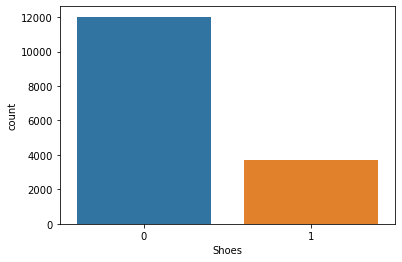

In [204]:
sns.countplot(x=df['Shoes'])

In [206]:
df['Sneakers']=df['title'].apply(lambda element:1 if 'Sneakers' in element else 0)
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,Shoes,Sneakers
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,1,0,698,999,30.13%,38.0,7.0,17.0,9.0,9.0,9.0,3,0,0,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,0,999,1999,50.03%,531.0,69.0,264.0,92.0,92.0,92.0,73,1,1,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,1,0,2749,4999,45.01%,17.0,4.0,11.0,3.0,3.0,3.0,0,1,0,1
3,495,Men Black Sports Sandal,4.2,0,0,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,12416.0,12416.0,4595,1,0,0
4,16408,Men Green Sports Sandal,3.9,0,0,1379,2299,40.02%,77.0,3.0,35.0,21.0,21.0,21.0,7,1,0,0


<AxesSubplot:xlabel='Sneakers', ylabel='count'>

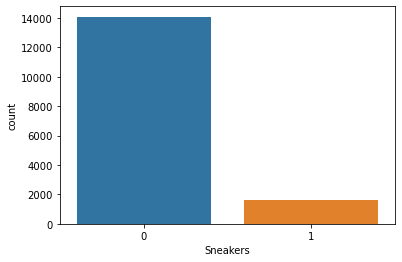

In [207]:
sns.countplot(x=df['Sneakers'])

In [208]:
df['Sandal']=df['title'].apply(lambda element:1 if 'Sandal' in element else 0)
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,Shoes,Sneakers,Sandal
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,1,0,698,999,30.13%,38.0,7.0,17.0,9.0,9.0,9.0,3,0,0,0,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,0,999,1999,50.03%,531.0,69.0,264.0,92.0,92.0,92.0,73,1,1,1,0
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,1,0,2749,4999,45.01%,17.0,4.0,11.0,3.0,3.0,3.0,0,1,0,1,0
3,495,Men Black Sports Sandal,4.2,0,0,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,12416.0,12416.0,4595,1,0,0,1
4,16408,Men Green Sports Sandal,3.9,0,0,1379,2299,40.02%,77.0,3.0,35.0,21.0,21.0,21.0,7,1,0,0,1


<AxesSubplot:xlabel='Sandal', ylabel='count'>

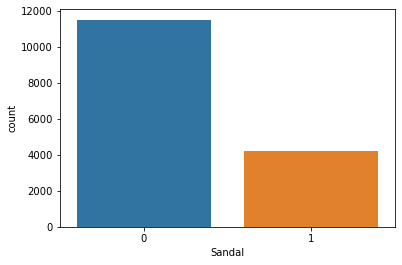

In [209]:
sns.countplot(x=df['Sandal'])

In [210]:
df['Slippers']=df['title'].apply(lambda element:1 if 'Slippers' in element else 0)
df['Flip Flops']=df['title'].apply(lambda element:1 if 'Flip Flops' in element else 0)
df['Bellies']=df['title'].apply(lambda element:1 if 'Bellies' in element else 0)
df['Crocs']=df['title'].apply(lambda element:1 if 'Crocs' in element else 0)
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,...,star_2f,star_1f,fulfilled1,Shoes,Sneakers,Sandal,Slippers,Flip Flops,Bellies,Crocs
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,1,0,698,999,30.13%,38.0,7.0,...,9.0,3,0,0,0,0,0,0,1,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,0,999,1999,50.03%,531.0,69.0,...,92.0,73,1,1,1,0,0,0,0,0
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,1,0,2749,4999,45.01%,17.0,4.0,...,3.0,0,1,0,1,0,0,0,0,0
3,495,Men Black Sports Sandal,4.2,0,0,518,724,15.85%,46413.0,6229.0,...,12416.0,4595,1,0,0,1,0,0,0,0
4,16408,Men Green Sports Sandal,3.9,0,0,1379,2299,40.02%,77.0,3.0,...,21.0,7,1,0,0,1,0,0,0,0


In [213]:
df['Boots']=df['title'].apply(lambda element:1 if 'Boots' in element else 0)
df['Heels']=df['title'].apply(lambda element:1 if 'Heels' in element else 0)
df['Loafers']=df['title'].apply(lambda element:1 if 'Loafers' in element else 0)
df['Slides']=df['title'].apply(lambda element:1 if 'Slides' in element else 0)
df['Mojaris']=df['title'].apply(lambda element:1 if 'Mojaris' in element else 0)
#juttis=['Jutis','Juttis']
#df['Jutis']=df['title'].apply(lambda element:1 if juttis in element else 0)
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,...,Sandal,Slippers,Flip Flops,Bellies,Crocs,Boots,Heels,Loafers,Slides,Mojaris
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,1,0,698,999,30.13%,38.0,7.0,...,0,0,0,1,0,0,0,0,0,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,0,999,1999,50.03%,531.0,69.0,...,0,0,0,0,0,0,0,0,0,0
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,1,0,2749,4999,45.01%,17.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,495,Men Black Sports Sandal,4.2,0,0,518,724,15.85%,46413.0,6229.0,...,1,0,0,0,0,0,0,0,0,0
4,16408,Men Green Sports Sandal,3.9,0,0,1379,2299,40.02%,77.0,3.0,...,1,0,0,0,0,0,0,0,0,0


In [218]:
df['Jutis']=df['title'].apply(lambda element:1 if 'Jutis' in element else 0)
#df['Jutis']=df['title'].apply(lambda element:1 if 'Juttis' in element else 0)


<AxesSubplot:xlabel='Jutis', ylabel='count'>

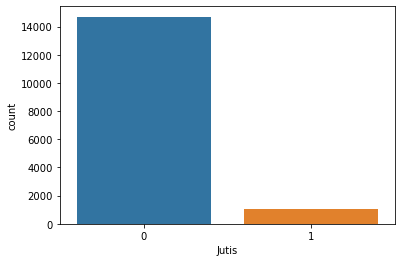

In [219]:
sns.countplot(x=df['Jutis'])

<AxesSubplot:xlabel='Juttis', ylabel='count'>

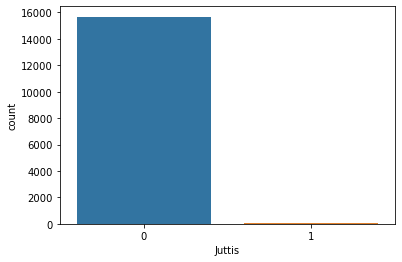

In [220]:
df['Juttis']=df['title'].apply(lambda element:1 if 'Juttis' in element else 0)
sns.countplot(x=df['Juttis'])

In [221]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,...,Flip Flops,Bellies,Crocs,Boots,Heels,Loafers,Slides,Mojaris,Jutis,Juttis
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,1,0,698,999,30.13%,38.0,7.0,...,0,1,0,0,0,0,0,0,0,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,0,999,1999,50.03%,531.0,69.0,...,0,0,0,0,0,0,0,0,0,0
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,1,0,2749,4999,45.01%,17.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,495,Men Black Sports Sandal,4.2,0,0,518,724,15.85%,46413.0,6229.0,...,0,0,0,0,0,0,0,0,0,0
4,16408,Men Green Sports Sandal,3.9,0,0,1379,2299,40.02%,77.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
df=df.drop(['Juttis'],axis=1)

In [223]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,...,Slippers,Flip Flops,Bellies,Crocs,Boots,Heels,Loafers,Slides,Mojaris,Jutis
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,1,0,698,999,30.13%,38.0,7.0,...,0,0,1,0,0,0,0,0,0,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,0,0,999,1999,50.03%,531.0,69.0,...,0,0,0,0,0,0,0,0,0,0
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,1,0,2749,4999,45.01%,17.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,495,Men Black Sports Sandal,4.2,0,0,518,724,15.85%,46413.0,6229.0,...,0,0,0,0,0,0,0,0,0,0
4,16408,Men Green Sports Sandal,3.9,0,0,1379,2299,40.02%,77.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
X=df.drop(['price1','title','Offer %'],axis=1)
X.head(5)
#X['Offer %'] = X['Offer %'].str.rstrip("%").astype(float)/10

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,...,Slippers,Flip Flops,Bellies,Crocs,Boots,Heels,Loafers,Slides,Mojaris,Jutis
0,16695,3.9,1,0,999,38.0,7.0,17.0,9.0,9.0,...,0,0,1,0,0,0,0,0,0,0
1,5120,3.8,0,0,1999,531.0,69.0,264.0,92.0,92.0,...,0,0,0,0,0,0,0,0,0,0
2,18391,4.4,1,0,4999,17.0,4.0,11.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,495,4.2,0,0,724,46413.0,6229.0,1045.0,12416.0,12416.0,...,0,0,0,0,0,0,0,0,0,0
4,16408,3.9,0,0,2299,77.0,3.0,35.0,21.0,21.0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
y=df['price1']
y.head()

0     698
1     999
2    2749
3     518
4    1379
Name: price1, dtype: int64

In [226]:
print(X.shape)

(15730, 26)


## Splitting the data into training and validation

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [228]:
print(X_train.shape)
print(X_val.shape)

(11011, 26)
(4719, 26)


## FEATURE SCALING

In [229]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)


### NOW AFTER ALL DATA CLEANING , DATA PREPROCESSING AND FEATURE SCALING WE HAVE OUR DATASET READY FOR TRAINING THE MODEL.


In [230]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [231]:

def report_model(model):
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    r2sc = r2_score(y_val,pred)
    MAE=mean_absolute_error(pred,y_val)
    RMSE=np.sqrt(mean_squared_error(pred,y_val))
    mean_price=df['price1'].mean()
    mae_by_mean=(MAE/mean_price)*100
    rmse_by_mean=(RMSE/mean_price)*100
    print('R2_SCORE :',r2sc)
    print('The MAE of',model,'model is',MAE )
    print('The RMSE of',model,'model is',RMSE )
    print('The MAE as percentage of mean price is :' ,mae_by_mean,'%')
    print('The RMSE as percentage of mean price is :' ,rmse_by_mean,'%')
    print(pred)

In [232]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
report_model(LR_model)

R2_SCORE : 0.781483545903771
The MAE of LinearRegression() model is 183.33027905499952
The RMSE of LinearRegression() model is 294.9482989621653
The MAE as percentage of mean price is : 26.64410516755939 %
The RMSE as percentage of mean price is : 42.865987751990886 %
[423.77987507 515.97461581 168.41672806 ... 278.89118657 340.95730538
 435.37628439]


In [233]:
mean_price=df['price1'].mean()
mean_price

688.0706929434202

## DATA CLEANING & PREPROCESSING FOR TEST DATA

In [234]:
test_df.isnull().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [235]:
print(test_df[test_df['title'].str.contains('Women')]['maincateg'].isna().sum())
print(test_df[test_df['title'].str.contains('Men')]['maincateg'].isna().sum())

0
0


In [236]:
test_df['maincateg'] = test_df[test_df['title'].str.contains('Women')]['maincateg'].fillna('Women')
test_df['maincateg'] = test_df['maincateg'].fillna('Men')
print(test_df['maincateg'].isna().sum())

0


In [237]:

test_df['Rating']=test_df['Rating'].fillna(test_df.groupby('maincateg')['Rating'].transform('mean'))
test_df['star_5f']=test_df['star_5f'].fillna(test_df.groupby('maincateg')['star_5f'].transform('mean'))
test_df['star_1f']=test_df['star_1f'].fillna(test_df.groupby('maincateg')['star_1f'].transform('mean'))
print(test_df.isnull().sum())

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64


In [238]:
test_df.shape

(5244, 14)

In [250]:
test_df['Shoes']=test_df['title'].apply(lambda element:1 if 'Shoes' in element else 0)
test_df['Sneakers']=test_df['title'].apply(lambda element:1 if 'Sneakers' in element else 0)
test_df['Sandal']=test_df['title'].apply(lambda element:1 if 'Sandal' in element else 0)
test_df['Slippers']=test_df['title'].apply(lambda element:1 if 'Slippers' in element else 0)
test_df['Flip Flops']=test_df['title'].apply(lambda element:1 if 'Flip Flops' in element else 0)
test_df['Bellies']=test_df['title'].apply(lambda element:1 if 'Bellies' in element else 0)
test_df['Crocs']=test_df['title'].apply(lambda element:1 if 'Crocs' in element else 0)
test_df['Boots']=test_df['title'].apply(lambda element:1 if 'Boots' in element else 0)
test_df['Heels']=test_df['title'].apply(lambda element:1 if 'Heels' in element else 0)
test_df['Loafers']=test_df['title'].apply(lambda element:1 if 'Loafers' in element else 0)
test_df['Slides']=test_df['title'].apply(lambda element:1 if 'Slides' in element else 0)
test_df['Mojaris']=test_df['title'].apply(lambda element:1 if 'Mojaris' in element else 0)
test_df['Jutis']=test_df['title'].apply(lambda element:1 if 'Jutis' in element else 0)
test_df.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,...,Slippers,Flip Flops,Bellies,Crocs,Boots,Heels,Loafers,Slides,Mojaris,Jutis
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,...,0,0,0,0,0,0,0,0,0,0
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,...,0,0,0,0,0,0,0,0,0,0
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,...,0,0,0,0,0,0,0,0,0,0
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,...,0,0,0,0,1,0,0,0,0,0
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:xlabel='Loafers', ylabel='count'>

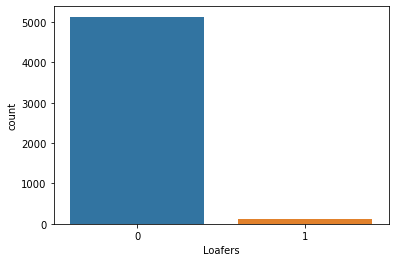

In [245]:
sns.countplot(x=test_df['Loafers'])

In [251]:
print(X.columns)
print(test_df.columns)

Index(['id', 'Rating', 'maincateg', 'platform', 'actprice1', 'norating1',
       'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f',
       'fulfilled1', 'Shoes', 'Sneakers', 'Sandal', 'Slippers', 'Flip Flops',
       'Bellies', 'Crocs', 'Boots', 'Heels', 'Loafers', 'Slides', 'Mojaris',
       'Jutis'],
      dtype='object')
Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'actprice1',
       'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f',
       'star_1f', 'fulfilled1', 'Shoes', 'Sneakers', 'Sandal', 'Slippers',
       'Flip Flops', 'Bellies', 'Crocs', 'Boots', 'Heels', 'Loafers', 'Slides',
       'Mojaris', 'Jutis'],
      dtype='object')


In [252]:
X_test=test_df.drop(['title'],axis=1)
X_test.head()



X_test['maincateg']=X_test['maincateg'].map({'Men':0,'Women':1})
X_test['platform']=X_test['platform'].map({'Flipkart':0,'Amazon':1})
X_test.head()

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,...,Slippers,Flip Flops,Bellies,Crocs,Boots,Heels,Loafers,Slides,Mojaris,Jutis
0,2242,3.8,0,0,999,27928,3543,14238.0,4295,3457,...,0,0,0,0,0,0,0,0,0,0
1,20532,3.9,1,0,499,3015,404,1458.0,657,397,...,0,0,0,0,0,0,0,0,0,0
2,10648,3.9,1,0,999,449,52,229.0,70,71,...,0,0,0,0,0,0,0,0,0,0
3,20677,3.9,0,0,2999,290,40,141.0,51,49,...,0,0,0,0,1,0,0,0,0,0
4,12593,3.9,0,0,999,2423,326,1265.0,414,293,...,0,0,0,0,0,0,1,0,0,0


In [253]:
print(X.shape)
print(X_test.shape)

(15730, 26)
(5244, 26)


In [254]:
X_test.head()

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,...,Slippers,Flip Flops,Bellies,Crocs,Boots,Heels,Loafers,Slides,Mojaris,Jutis
0,2242,3.8,0,0,999,27928,3543,14238.0,4295,3457,...,0,0,0,0,0,0,0,0,0,0
1,20532,3.9,1,0,499,3015,404,1458.0,657,397,...,0,0,0,0,0,0,0,0,0,0
2,10648,3.9,1,0,999,449,52,229.0,70,71,...,0,0,0,0,0,0,0,0,0,0
3,20677,3.9,0,0,2999,290,40,141.0,51,49,...,0,0,0,0,1,0,0,0,0,0
4,12593,3.9,0,0,999,2423,326,1265.0,414,293,...,0,0,0,0,0,0,1,0,0,0


#### NOW OUR TEST DATA IS READY FOR PREDICTIONS

In [255]:
final_model=LinearRegression()
X=scaler.fit_transform(X)
X_test=scaler.transform(X_test)
final_model.fit(X,y)
predictions1=final_model.predict(X_test)

print(predictions1)

[410.53728958 302.29670534 527.54166319 ... 453.51960355 212.34587336
 746.09723117]


In [256]:
product_id=test_df['id']
print(product_id)
price=pd.Series(predictions1)
print(price)
#submission= pd.merge(product_id, predictions, right_index = True,left_index = True)
#submission

0        2242
1       20532
2       10648
3       20677
4       12593
        ...  
5239    14033
5240      297
5241    18733
5242     6162
5243    13574
Name: id, Length: 5244, dtype: int64
0        410.537290
1        302.296705
2        527.541663
3       1361.983787
4        409.537519
           ...     
5239     416.439369
5240     912.489384
5241     453.519604
5242     212.345873
5243     746.097231
Length: 5244, dtype: float64


In [257]:
print(product_id.shape)
print(price.shape)
print(product_id.isnull().sum())
print(price.isnull().sum())

(5244,)
(5244,)
0
0


In [258]:
data = {"id": product_id,"price1": price}

In [259]:
submission1 = pd.concat(data,axis = 1)

In [260]:
submission1=submission1.round(0)
submission1

,id,price1
0,2242,411.0
1,20532,302.0
2,10648,528.0
3,20677,1362.0
4,12593,410.0
...,...,...
5239,14033,416.0
5240,297,912.0
5241,18733,454.0
5242,6162,212.0


In [261]:
print(submission1.shape)
print(submission1.isnull().sum())


(5244, 2)
id        0
price1    0
dtype: int64


In [262]:
submission1.to_csv('kaggle competitions submit -c sa2022 -f submission.csv')

In [138]:
pwd

'C:\\Users\\jabhi\\Untitled Folder'

## POLYNOMIAL REGRESSION

In [263]:
from sklearn.preprocessing import PolynomialFeatures

In [264]:
from sklearn.preprocessing import PolynomialFeatures

In [265]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [266]:
X.shape

(15730, 26)

In [267]:
poly_features=polynomial_converter.fit_transform(X)

In [268]:
poly_features.shape

(15730, 377)

### DATA PREPROCESSING FOR POLYNOMIAL REGRESSION

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(poly_features,y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_val.shape)

(11011, 377)
(4719, 377)


In [270]:
pr_model=LinearRegression(fit_intercept=True)
report_model(pr_model)

R2_SCORE : -11926342944579.795
The MAE of LinearRegression() model is 47093846.05910584
The RMSE of LinearRegression() model is 2179001204.31814
The MAE as percentage of mean price is : 6844332.499855266 %
The RMSE as percentage of mean price is : 316682751.7383186 %
[403.12477112 599.20462036 178.99308014 ... 249.38166809 409.42041779
 654.77022552]


### Submission

In [46]:
poly_feat= polynomial_converter.fit_transform(X_test)

In [47]:
final_model=LinearRegression(fit_intercept=True)

final_model.fit(poly_features,y)
predictions=final_model.predict(poly_feat)

print(predictions)

[188.81691053 276.8071209  498.53259787 ... 408.8823651  235.11375712
 624.60345137]


In [48]:
product_id=test_df['id']
price=pd.Series(predictions)


data = {"id": product_id,"price1": price}

submission = pd.concat(data,axis = 1)

submission=submission.round(0)

submission



,id,price1
0,2242,189.0
1,20532,277.0
2,10648,499.0
3,20677,1382.0
4,12593,429.0
...,...,...
5239,14033,381.0
5240,297,794.0
5241,18733,409.0
5242,6162,235.0


In [49]:
print(submission.shape)
print(submission.isnull().sum())


(5244, 2)
id        0
price1    0
dtype: int64


In [50]:
submission.to_csv('kaggle competitions submit -c sa2022 -f submission.csv')

In [45]:
polynomial_converter=PolynomialFeatures(degree=3,include_bias=False)
poly_features=polynomial_converter.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(poly_features,y, test_size=0.3, random_state=101)
pr_model=LinearRegression(fit_intercept=True)
report_model(pr_model)

R2_SCORE : -0.8734542633661366
The MAE of LinearRegression() model is 199.40782415959944
The RMSE of LinearRegression() model is 863.6253289884777
The MAE as percentage of mean price is : 28.980717563565328 %
The RMSE as percentage of mean price is : 125.51404061319222 %
[439.40480223 564.16139669 219.24113481 ... 310.04831267 408.43221469
 624.03833755]


In [ ]:
#polynomial_converter=PolynomialFeatures(degree=6,include_bias=False)
#poly_features=polynomial_converter.fit_transform(X)
#_train, X_val, y_train, y_val = train_test_split(poly_features,y, test_size=0.3, random_state=101)
#pr_model=LinearRegression(fit_intercept=True)
#report_model(pr_model)

## LASSO REGRESSION

In [271]:
from sklearn.linear_model import LassoCV

In [272]:
lassoCV_model=LassoCV(eps=0.01,n_alphas=100,cv=5)
report_model(lassoCV_model)

R2_SCORE : 0.7870212558385481
The MAE of LassoCV(cv=5, eps=0.01) model is 178.23831110713584
The RMSE of LassoCV(cv=5, eps=0.01) model is 291.18698152189154
The MAE as percentage of mean price is : 25.904069586901052 %
The RMSE as percentage of mean price is : 42.31934080439548 %
[412.82482266 511.87546301 214.87072925 ... 294.69484501 403.01731739
 425.92371301]


In [51]:
lassoCV_model=LassoCV(eps=0.001,n_alphas=100,cv=5)
report_model(lassoCV_model)

D:\JAVA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452662.7754383087, tolerance: 373757.99870162347
  model = cd_fast.enet_coordinate_descent_gram(
D:\JAVA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 858268.7216535807, tolerance: 373757.99870162347
  model = cd_fast.enet_coordinate_descent_gram(
D:\JAVA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1488089.7765636444, tolerance: 373757.99870162347
  model = cd_fast.enet_coordinate_descent_gram(
D:\JAVA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to 

D:\JAVA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2332155.7228046656, tolerance: 377435.23475168564
  model = cd_fast.enet_coordinate_descent_gram(
D:\JAVA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12756214.138543129, tolerance: 377435.23475168564
  model = cd_fast.enet_coordinate_descent_gram(
D:\JAVA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12462075.189761162, tolerance: 377435.23475168564
  model = cd_fast.enet_coordinate_descent_gram(
D:\JAVA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want t

R2_SCORE : 0.7918868689162686
The MAE of LassoCV(cv=5) model is 177.16640147831404
The RMSE of LassoCV(cv=5) model is 287.8416033941025
The MAE as percentage of mean price is : 25.7482847758613 %
The RMSE as percentage of mean price is : 41.833143940890324 %
[486.34859803 508.81884315 205.99720085 ... 307.01340163 410.53097607
 570.92120418]


D:\JAVA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.626e+07, tolerance: 4.754e+05
  model = cd_fast.enet_coordinate_descent(


In [274]:
lassoCV_model=LassoCV(eps=0.001,n_alphas=1000,cv=10)
report_model(lassoCV_model)

R2_SCORE : 0.8007648889390029
The MAE of LassoCV(cv=10, n_alphas=1000) model is 171.13944537295262
The RMSE of LassoCV(cv=10, n_alphas=1000) model is 281.6350883291551
The MAE as percentage of mean price is : 24.87236371612551 %
The RMSE as percentage of mean price is : 40.931126876568456 %
[355.04859953 606.08312818 195.31333592 ... 283.05027899 410.57599858
 591.05024671]


In [273]:
#lassoCV_model.alphas_


In [277]:
lassoCV_model=LassoCV(eps=0.001,n_alphas=1000,cv=10)
lassoCV_model.fit(X,y)
lasso_prediction=lassoCV_model.predict(X_test)
lasso_prediction


product_id=test_df['id']

price=pd.Series(lasso_prediction)

data = {"id": product_id,"price1": price}
submission_lasso = pd.concat(data,axis = 1)
submission_lasso=submission_lasso.round(0)
submission_lasso

,id,price1
0,2242,430.0
1,20532,305.0
2,10648,528.0
3,20677,1364.0
4,12593,413.0
...,...,...
5239,14033,418.0
5240,297,910.0
5241,18733,452.0
5242,6162,217.0


In [278]:
submission_lasso.to_csv('kaggle competitions submit -c sa2022 -f submission.csv')

### LASSOCV MODEL performed the same way like Linear Regresssion model

## RIDGE REGRESSION

In [279]:
from sklearn.linear_model import RidgeCV

In [280]:
ridgeCV_model=RidgeCV(alphas=(.01,0.1,1,10),scoring='neg_mean_absolute_error')
report_model(ridgeCV_model)

R2_SCORE : 0.7997791235141579
The MAE of RidgeCV(alphas=array([ 0.01,  0.1 ,  1.  , 10.  ]),
        scoring='neg_mean_absolute_error') model is 170.9738978346183
The RMSE of RidgeCV(alphas=array([ 0.01,  0.1 ,  1.  , 10.  ]),
        scoring='neg_mean_absolute_error') model is 282.3309585796504
The MAE as percentage of mean price is : 24.848304046089844 %
The RMSE as percentage of mean price is : 41.03226041671657 %
[424.19434229 607.50487574 181.83501452 ... 269.33003541 408.40501428
 663.80263445]


In [281]:
ridgeCV_model=RidgeCV(alphas=(.01,0.1,1,10),scoring='neg_mean_absolute_error',gcv_mode='auto')
report_model(ridgeCV_model)

R2_SCORE : 0.7997791235141579
The MAE of RidgeCV(alphas=array([ 0.01,  0.1 ,  1.  , 10.  ]), gcv_mode='auto',
        scoring='neg_mean_absolute_error') model is 170.9738978346183
The RMSE of RidgeCV(alphas=array([ 0.01,  0.1 ,  1.  , 10.  ]), gcv_mode='auto',
        scoring='neg_mean_absolute_error') model is 282.3309585796504
The MAE as percentage of mean price is : 24.848304046089844 %
The RMSE as percentage of mean price is : 41.03226041671657 %
[424.19434229 607.50487574 181.83501452 ... 269.33003541 408.40501428
 663.80263445]


In [ ]:
ridgeCV_model=RidgeCV(alphas=(.01,0.1,1,10),scoring='neg_mean_absolute_error',gcv_mode='eigen')
report_model(ridgeCV_model)

In [35]:
ridgeCV_model=RidgeCV(alphas=(0.1,1,10),scoring='neg_mean_absolute_error',gcv_mode='svd')
report_model(ridgeCV_model)

The MAE of RidgeCV(alphas=array([ 0.1,  1. , 10. ]), gcv_mode='svd',
        scoring='neg_mean_absolute_error') model is 184.77524737211166
The RMSE of RidgeCV(alphas=array([ 0.1,  1. , 10. ]), gcv_mode='svd',
        scoring='neg_mean_absolute_error') model is 296.2978123353042
The MAE as percentage of mean price is : 26.854108054171355 %
The RMSE as percentage of mean price is : 43.06211779894375 %


## KNN 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
knn=KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
report_model(knn)

R2_SCORE : 0.7706716525264155
The MAE of KNeighborsRegressor() model is 177.2207671116762
The RMSE of KNeighborsRegressor() model is 302.1570239674516
The MAE as percentage of mean price is : 25.756185945598613 %
The RMSE as percentage of mean price is : 43.91365989952109 %
[455.  686.6 212.2 ... 376.  348.  567.4]


In [64]:
knn=KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=1, metric='minkowski')
report_model(knn)

R2_SCORE : 0.7796759605660453
The MAE of KNeighborsRegressor(p=1) model is 169.97652044924772
The RMSE of KNeighborsRegressor(p=1) model is 296.1657043213982
The MAE as percentage of mean price is : 24.703351296961113 %
The RMSE as percentage of mean price is : 43.042918025539535 %
[455.  656.4 247.4 ... 296.  348.  567.4]


In [65]:
knn=KNeighborsRegressor(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
report_model(knn)

R2_SCORE : 0.7543339746572566
The MAE of KNeighborsRegressor(n_neighbors=3) model is 181.88352051988417
The RMSE of KNeighborsRegressor(n_neighbors=3) model is 312.7349170942486
The MAE as percentage of mean price is : 26.433842101576094 %
The RMSE as percentage of mean price is : 45.45098640321899 %
[469.         681.33333333 187.66666667 ... 309.         342.33333333
 629.66666667]


In [66]:

knn=KNeighborsRegressor(n_neighbors=2, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
report_model(knn)

R2_SCORE : 0.7408131595129763
The MAE of KNeighborsRegressor(n_neighbors=2) model is 184.2938122483577
The RMSE of KNeighborsRegressor(n_neighbors=2) model is 321.2257097611744
The MAE as percentage of mean price is : 26.784139208136875 %
The RMSE as percentage of mean price is : 46.684986449145086 %
[469.  653.5 192.  ... 314.  421.  629.5]


In [67]:
knn=KNeighborsRegressor(n_neighbors=8, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
report_model(knn)

R2_SCORE : 0.7731390204522163
The MAE of KNeighborsRegressor(n_neighbors=8) model is 176.33765098537825
The RMSE of KNeighborsRegressor(n_neighbors=8) model is 300.5271584615192
The MAE as percentage of mean price is : 25.62783923132131 %
The RMSE as percentage of mean price is : 43.67678518262824 %
[455.875 649.5   255.625 ... 344.125 375.125 532.375]


In [68]:
knn=KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
report_model(knn)

R2_SCORE : 0.7750843514049294
The MAE of KNeighborsRegressor(weights='distance') model is 172.52713915386062
The RMSE of KNeighborsRegressor(weights='distance') model is 299.23587541403543
The MAE as percentage of mean price is : 25.074042670793922 %
The RMSE as percentage of mean price is : 43.489117976231185 %
[463.25846521 653.697822   207.00617245 ... 363.08545903 336.61373964
 597.45935163]


### Even after tuning the hyperparameters the KNN performance in the regression problem is very poor.

## SVM

In [47]:
from sklearn.svm import SVR

In [70]:
svr_model=SVR()
report_model(svr_model)

The MAE of SVR() model is 249.47212710681012
The RMSE of SVR() model is 495.3981657983999
The MAE as percentage of mean price is : 36.25675815948814 %
The RMSE as percentage of mean price is : 71.99814944583554 %


### Now using Grid Search for getting a better model performance.

In [73]:
param_grid={'C':[0.001,0.01,0.1,0.3,0.5,1],
            'kernel':['linear','rbf','poly'],
           'gamma':['scale','auto',0,10,100],
           'epsilon':[0,0.01,0.05,0.1,0.5,1,2]}

In [74]:
from sklearn.model_selection import GridSearchCV
svr=SVR()
grid=GridSearchCV(svr,param_grid=param_grid)

In [ ]:
#report_model(grid)

## DECISON TREE


In [155]:
from sklearn.tree import DecisionTreeRegressor

In [156]:
dt_model=DecisionTreeRegressor()
report_model(dt_model)

R2_SCORE : 0.7874280720146044
The MAE of DecisionTreeRegressor() model is 126.18457300275482
The RMSE of DecisionTreeRegressor() model is 290.90874672182434
The MAE as percentage of mean price is : 18.338896612928536 %
The RMSE as percentage of mean price is : 42.278903854686575 %
[499. 699. 185. ... 284. 564. 629.]


In [157]:
dt_model=DecisionTreeRegressor(max_depth=8,random_state=101)
report_model(dt_model)

R2_SCORE : 0.8196706769019392
The MAE of DecisionTreeRegressor(max_depth=8, random_state=101) model is 156.7546207773783
The RMSE of DecisionTreeRegressor(max_depth=8, random_state=101) model is 267.939658683682
The MAE as percentage of mean price is : 22.781760999994834 %
The RMSE as percentage of mean price is : 38.940716619900364 %
[445.88888889 453.21702128 248.         ... 301.82997118 382.75105485
 595.13924051]


In [158]:
dt_model=DecisionTreeRegressor(max_depth=10)
report_model(dt_model)

R2_SCORE : 0.8140273069730299
The MAE of DecisionTreeRegressor(max_depth=10) model is 149.55429293400513
The RMSE of DecisionTreeRegressor(max_depth=10) model is 272.09991968090327
The MAE as percentage of mean price is : 21.735309244787572 %
The RMSE as percentage of mean price is : 39.54534359208319 %
[514.33333333 564.48235294 213.1        ... 293.97297297 396.17006803
 743.69387755]


In [160]:
dt_model=DecisionTreeRegressor(max_depth=8,criterion='mse', splitter='best',max_features='sqrt', random_state=101)
report_model(dt_model)
#help(DecisionTreeRegressor)

R2_SCORE : 0.5061935732635763
The MAE of DecisionTreeRegressor(max_depth=8, max_features='sqrt', random_state=101) model is 255.11293030271875
The RMSE of DecisionTreeRegressor(max_depth=8, max_features='sqrt', random_state=101) model is 443.3862209561783
The MAE as percentage of mean price is : 37.07655810937098 %
The RMSE as percentage of mean price is : 64.43905044981153 %
[400.64835165 672.93333333 382.9402229  ... 402.73684211 382.9402229
 759.21875   ]


In [161]:
dt_model=DecisionTreeRegressor(criterion='mse', splitter='best',max_features='log2', random_state=101)
report_model(dt_model)

R2_SCORE : 0.6764351257205987
The MAE of DecisionTreeRegressor(max_features='log2', random_state=101) model is 148.189023098114
The RMSE of DecisionTreeRegressor(max_features='log2', random_state=101) model is 358.90913164849104
The MAE as percentage of mean price is : 21.536889249590452 %
The RMSE as percentage of mean price is : 52.16166526627577 %
[379. 699. 185. ... 284. 399. 629.]


In [163]:
dt_model=DecisionTreeRegressor(criterion='mse', splitter='best',max_features='auto', random_state=101)
report_model(dt_model)

R2_SCORE : 0.7888414519282622
The MAE of DecisionTreeRegressor(max_features='auto', random_state=101) model is 124.79020979020979
The RMSE of DecisionTreeRegressor(max_features='auto', random_state=101) model is 289.9400150602214
The MAE as percentage of mean price is : 18.13624836372318 %
The RMSE as percentage of mean price is : 42.13811430042452 %
[499. 699. 185. ... 284. 564. 629.]


In [164]:
dt_model=DecisionTreeRegressor(criterion='mae', splitter='best',max_features='auto', random_state=101)
report_model(dt_model)

R2_SCORE : 0.7640669888775762
The MAE of DecisionTreeRegressor(criterion='mae', max_features='auto', random_state=101) model is 134.92667938122483
The RMSE of DecisionTreeRegressor(criterion='mae', max_features='auto', random_state=101) model is 306.4772053338998
The MAE as percentage of mean price is : 19.609421061669867 %
The RMSE as percentage of mean price is : 44.541528723285026 %
[497. 699. 185. ... 284. 303. 629.]


In [165]:
dt_model=DecisionTreeRegressor(max_depth=8,criterion='mae', splitter='best',max_features='auto', random_state=101)
report_model(dt_model)

R2_SCORE : 0.7821901589815812
The MAE of DecisionTreeRegressor(criterion='mae', max_depth=8, max_features='auto',
                      random_state=101) model is 161.01716465352828
The RMSE of DecisionTreeRegressor(criterion='mae', max_depth=8, max_features='auto',
                      random_state=101) model is 294.47102807276616
The MAE as percentage of mean price is : 23.401253142279764 %
The RMSE as percentage of mean price is : 42.79662411039216 %
[471. 449. 243. ... 299. 699. 630.]


In [172]:
dt_model=DecisionTreeRegressor(max_depth=6,criterion='mae', splitter='random',max_features='auto', random_state=101)
report_model(dt_model)

R2_SCORE : 0.7650001052541487
The MAE of DecisionTreeRegressor(criterion='mae', max_depth=6, max_features='auto',
                      random_state=101, splitter='random') model is 178.7361729179911
The RMSE of DecisionTreeRegressor(criterion='mae', max_depth=6, max_features='auto',
                      random_state=101, splitter='random') model is 305.87054537443476
The MAE as percentage of mean price is : 25.97642578750095 %
The RMSE as percentage of mean price is : 44.45336046300498 %
[399.5 498.  243.  ... 299.  399.5 498. ]


In [30]:
dt_model=DecisionTreeRegressor(criterion='friedman_mse', splitter='best',max_features='auto', random_state=101)
report_model(dt_model)

The MAE of DecisionTreeRegressor(criterion='friedman_mse', max_features='auto',
                      random_state=101) model is 124.79020979020979
The RMSE of DecisionTreeRegressor(criterion='friedman_mse', max_features='auto',
                      random_state=101) model is 289.9400150602214
The MAE as percentage of mean price is : 18.13624836372318 %
The RMSE as percentage of mean price is : 42.13811430042452 %


In [31]:
dt_model=DecisionTreeRegressor(criterion='absolute_error', splitter='best',max_features='auto', random_state=101)
report_model(dt_model)

The MAE of DecisionTreeRegressor(criterion='absolute_error', max_features='auto',
                      random_state=101) model is 134.92667938122483
The RMSE of DecisionTreeRegressor(criterion='absolute_error', max_features='auto',
                      random_state=101) model is 306.4772053338998
The MAE as percentage of mean price is : 19.609421061669867 %
The RMSE as percentage of mean price is : 44.541528723285026 %


In [32]:
dt_model=DecisionTreeRegressor(criterion='poisson', splitter='best',max_features='auto', random_state=101)
report_model(dt_model)

The MAE of DecisionTreeRegressor(criterion='poisson', max_features='auto',
                      random_state=101) model is 156.01440983259164
The RMSE of DecisionTreeRegressor(criterion='poisson', max_features='auto',
                      random_state=101) model is 318.45779506682163
The MAE as percentage of mean price is : 22.674183253641445 %
The RMSE as percentage of mean price is : 46.2827146008104 %


In [179]:
final_dt_model=DecisionTreeRegressor(max_depth=6,criterion='mse', splitter='best',max_features='auto', random_state=101)
report_model(final_dt_model)


R2_SCORE : 0.7965551590190854
The MAE of DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=101) model is 170.5634140894079
The RMSE of DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=101) model is 284.59493346790975
The MAE as percentage of mean price is : 24.78864684088983 %
The RMSE as percentage of mean price is : 41.36129272567519 %
[361.86666667 451.86699765 225.42105263 ... 301.10747051 451.86699765
 577.23385301]


### NOW , I will get the predictions on test dataset using the most optimized Decision Tree model.

In [180]:
X_test.head()

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,3.8,0,0,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,3.9,1,0,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,3.9,1,0,999,449,52,229.0,70,71,33,46.0,1
3,20677,3.9,0,0,2999,290,40,141.0,51,49,17,32.0,1
4,12593,3.9,0,0,999,2423,326,1265.0,414,293,143,308.0,0


In [181]:
X.head()

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,3.9,1,0,999,38.0,7.0,17.0,9.0,9.0,9.0,3,0
1,5120,3.8,0,0,1999,531.0,69.0,264.0,92.0,92.0,92.0,73,1
2,18391,4.4,1,0,4999,17.0,4.0,11.0,3.0,3.0,3.0,0,1
3,495,4.2,0,0,724,46413.0,6229.0,1045.0,12416.0,12416.0,12416.0,4595,1
4,16408,3.9,0,0,2299,77.0,3.0,35.0,21.0,21.0,21.0,7,1


In [192]:
model_dt=DecisionTreeRegressor(max_depth=4)
model_dt.fit(X,y)
pred=model_dt.predict(X_test)
print(pred)

[477.58099524 301.33693046 477.58099524 ... 477.58099524 301.33693046
 477.58099524]


In [ ]:
final_dt_model=DecisionTreeRegressor(max_depth=8,criterion='mse', splitter='best',max_features='auto', random_state=101)
final_model.fit(X_train,y_train)
dt_predictions=final_model.predict(X_test)

print(dt_predictions)

In [187]:
final_dt_model=DecisionTreeRegressor(max_depth=8,criterion='mse', splitter='best',max_features='auto', random_state=101)
final_dt_model.fit(X,y)
dt_predictions=final_dt_model.predict(X_test)

print(dt_predictions)

[454.72028548 308.65714286 454.72028548 ... 454.72028548 266.04678363
 742.88888889]


In [188]:
final_model=DecisionTreeRegressor(max_depth=8 , criterion='mse', splitter='best',max_features='auto', random_state=101)
scaled_X=scaler.fit_transform(X)
scaled_X_test=scaler.transform(X_test)
final_model.fit(scaled_X,y)
predictions2=final_model.predict(scaled_X_test)

print(predictions2)

[454.72028548 308.65714286 454.72028548 ... 454.72028548 266.04678363
 742.88888889]


In [82]:
product_id=test_df['id']

price=pd.Series(predictions)


In [84]:
data = {"id": product_id,"price1": price}

In [85]:
submission = pd.concat(data,axis = 1)

In [86]:
submission=submission.round(0)
submission

,id,price1
0,2242,431.0
1,20532,160.0
2,10648,499.0
3,20677,765.0
4,12593,405.0
...,...,...
5239,14033,588.0
5240,297,899.0
5241,18733,462.0
5242,6162,189.0


In [87]:
submission.to_csv('kaggle competitions submit -c sa2022 -f submission.csv')

### Hence, here I had completed my model using Decision Tree Regression and made the submission. This model performed very well as compared to other models.

###    

## RANDOM FOREST

In [193]:
from sklearn.ensemble import RandomForestRegressor

In [195]:
rf_model=RandomForestRegressor(n_estimators=100, criterion='mse')
report_model(rf_model)

R2_SCORE : 0.8780149477611707
The MAE of RandomForestRegressor() model is 112.24291587200679
The RMSE of RandomForestRegressor() model is 220.3723646744917
The MAE as percentage of mean price is : 16.312701154565303 %
The RMSE as percentage of mean price is : 32.02757608114154 %
[458.49 698.69 202.61 ... 285.62 423.28 632.31]


In [196]:
rf_model=RandomForestRegressor(max_depth=8,n_estimators=100, criterion='mse')
report_model(rf_model)

R2_SCORE : 0.8421796078205058
The MAE of RandomForestRegressor(max_depth=8) model is 151.44462725838977
The RMSE of RandomForestRegressor(max_depth=8) model is 250.66020048598776
The MAE as percentage of mean price is : 22.01003891192369 %
The RMSE as percentage of mean price is : 36.429425501864735 %
[441.37481713 480.16530235 242.76654371 ... 305.92364423 417.45146426
 636.91053446]


In [298]:
rf_model=RandomForestRegressor(max_depth=6,n_estimators=100, criterion='mse')
report_model(rf_model)

R2_SCORE : 0.8402527854306274
The MAE of RandomForestRegressor(max_depth=6) model is 154.1020965431202
The RMSE of RandomForestRegressor(max_depth=6) model is 252.18570820825735
The MAE as percentage of mean price is : 22.396259297704454 %
The RMSE as percentage of mean price is : 36.65113349465016 %
[448.61601571 466.84274833 299.18675501 ... 296.91471715 482.28782689
 509.31625095]


In [294]:

model=RandomForestRegressor(max_depth=8,n_estimators=100, criterion='mse')
model.fit(X,y)
prediction=model.predict(X_test)
prediction

array([465.43699212, 309.65962916, 465.43699212, ..., 462.55155789,
       260.54125405, 634.16385529])

In [295]:

product_id=test_df['id']

price=pd.Series(predictions)

data = {"id": product_id,"price1": price}
submission_rf = pd.concat(data,axis = 1)
submission_rf=submission_rf.round(0)
submission_rf

,id,price1
0,2242,455.0
1,20532,309.0
2,10648,455.0
3,20677,1077.0
4,12593,455.0
...,...,...
5239,14033,448.0
5240,297,532.0
5241,18733,455.0
5242,6162,266.0


In [89]:
submission_rf.to_csv('kaggle competitions submit -c sa2022 -f submission.csv')

In [308]:

model=RandomForestRegressor(max_depth=6,n_estimators=100, criterion='mse')
model.fit(X,y)
prediction_rf2=model.predict(X_test)
prediction_rf2

array([456.2572694 , 310.10023022, 456.2572694 , ..., 454.8416024 ,
       281.14080191, 614.25182613])

In [309]:

product_id=test_df['id']

price=pd.Series(prediction_rf2)

data = {"id": product_id,"price1": price}
submission_rf2 = pd.concat(data,axis = 1)
submission_rf2=submission_rf2.round(0)
submission_rf2

,id,price1
0,2242,456.0
1,20532,310.0
2,10648,456.0
3,20677,1245.0
4,12593,455.0
...,...,...
5239,14033,445.0
5240,297,621.0
5241,18733,455.0
5242,6162,281.0


In [310]:
submission_rf2.to_csv('kaggle competitions submit -c sa2022 -f submission.csv')

######  

######  

## BOOSTING METHODS

### ADA-BOOST

In [287]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_model = AdaBoostRegressor(random_state=101)
report_model(adaboost_model)

R2_SCORE : 0.7392828300285734
The MAE of AdaBoostRegressor(random_state=101) model is 242.4050206924547
The RMSE of AdaBoostRegressor(random_state=101) model is 322.1726283845899
The MAE as percentage of mean price is : 35.229667994650015 %
The RMSE as percentage of mean price is : 46.82260582941033 %
[603.29899857 683.15284974 513.87827715 ... 533.13000756 533.13000756
 695.35894207]


In [288]:
adaboost_model = AdaBoostRegressor(n_estimators=100 , loss='square', random_state=101)
report_model(adaboost_model)

R2_SCORE : 0.7391219489225639
The MAE of AdaBoostRegressor(loss='square', n_estimators=100, random_state=101) model is 231.87403321875215
The RMSE of AdaBoostRegressor(loss='square', n_estimators=100, random_state=101) model is 322.2720148103479
The MAE as percentage of mean price is : 33.69915847263372 %
The RMSE as percentage of mean price is : 46.83705004666551 %
[628.08168028 615.25256674 524.0678733  ... 510.03090508 524.0678733
 800.1353167 ]


In [291]:
adaboost_model = AdaBoostRegressor(random_state=101)
adaboost_model.fit(X,y)
adaboost_prediction=adaboost_model.predict(X_test)
adaboost_prediction


product_id=test_df['id']

price=pd.Series(adaboost_prediction)

data = {"id": product_id,"price1": price}
submission_adaboost = pd.concat(data,axis = 1)
submission_adaboost=submission_adaboost.round(0)
submission_adaboost

,id,price1
0,2242,557.0
1,20532,557.0
2,10648,574.0
3,20677,1523.0
4,12593,590.0
...,...,...
5239,14033,574.0
5240,297,1002.0
5241,18733,550.0
5242,6162,557.0


### GRADIENT BOOSTING

In [289]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()
report_model(gb_model)

R2_SCORE : 0.8396353549725841
The MAE of GradientBoostingRegressor() model is 153.09963602469503
The RMSE of GradientBoostingRegressor() model is 252.6725929841916
The MAE as percentage of mean price is : 22.250567797004596 %
The RMSE as percentage of mean price is : 36.721894359911175 %
[434.29039104 572.59837749 281.04366446 ... 300.71796725 457.72985061
 530.91831949]


In [292]:
gb_model=GradientBoostingRegressor()
gb_model.fit(X,y)
gb_prediction=gb_model.predict(X_test)
gb_prediction


product_id=test_df['id']

price=pd.Series(gb_prediction)

data = {"id": product_id,"price1": price}
submission_gb = pd.concat(data,axis = 1)
submission_gb=submission_gb.round(0)
submission_gb

,id,price1
0,2242,426.0
1,20532,316.0
2,10648,451.0
3,20677,1256.0
4,12593,418.0
...,...,...
5239,14033,416.0
5240,297,693.0
5241,18733,429.0
5242,6162,232.0


In [293]:
submission_gb.to_csv('kaggle competitions submit -c sa2022 -f submission.csv')

In [304]:
gb_model=GradientBoostingRegressor(learning_rate=0.1, n_estimators=150)
gb_model.fit(X,y)
gb_prediction=gb_model.predict(X_test)
gb_prediction


product_id=test_df['id']

price=pd.Series(gb_prediction)

data = {"id": product_id,"price1": price}
submission_gb = pd.concat(data,axis = 1)
submission_gb=submission_gb.round(0)
submission_gb

,id,price1
0,2242,404.0
1,20532,314.0
2,10648,453.0
3,20677,1246.0
4,12593,410.0
...,...,...
5239,14033,419.0
5240,297,688.0
5241,18733,433.0
5242,6162,227.0


In [305]:
submission_gb.to_csv('kaggle competitions submit -c sa2022 -f submission.csv')